# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> AYU IMAS SUSANTI <span style="color: #000000"> <br>UJIAN PRAKTIK COMPUTER VISION</span></b><br><span style="color: #FF5C8A; font-size: 24px">FIBONACCI </span></h1>
<hr>

# 1. Importing packages

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

### importing ini digunakan untuk mengimpor fungsi yang akan digunakan pada kode.

In [12]:
path = '../input/4-animal-classification'

### pada path ini digunakan untuk memasukkan dataset

# 2. Visualising data

In [13]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,horse,600
1,dog,900
2,cat,700
3,deer,600


### pada df = pd.DataFrame ini digunakan untuk menampilkan class pada dataset

<AxesSubplot:xlabel='Name of class', ylabel='Number of samples'>

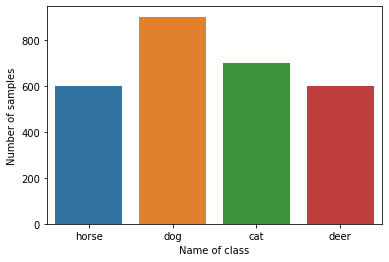

In [14]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

### sns.barplot digunakan untuk menampilkan class pada dataset berupa barplot dan kemudian dari barplot ini kita dapat mengetahui urutan hewan mana saja yang memiliki jumlah terbanyak

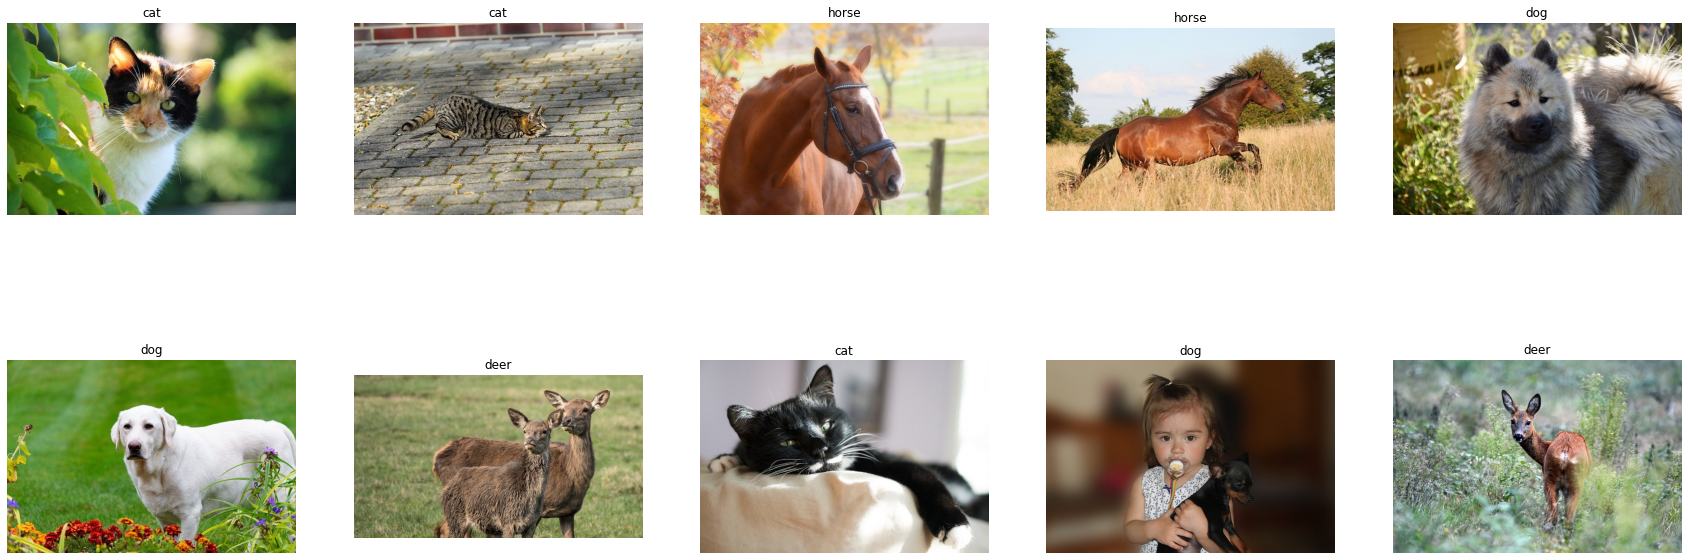

In [15]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

### classes digunakan untuk memanggil data dari dataset kemudian code disini digunakan untuk mengatur ukuran gambar dan mengkategorikan berdasarkan kategorinya masing-masing.

# 3. Preparing the data

In [16]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

### image datagen digunakan untuk mengklasifikasi gambar agar pengelompokkan lebih mudah dan efisien

In [17]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32)

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


### target size yaitu untuk menentukan dimensi dari citra yang akan digunakan dalam proses training.
### batch size yaitu untuk menentukan banyaknya citra yang akan dimasukkan dalam setiap steps training.

# 4. Building the model

In [18]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

### disini kita akan membuat suatu base model dari code yang akan kita gunakan dengan menggunakan model sequential 
Input_shape merupakan dimensi dari gambar yang akan kita gunakan atau input dari citra
include_top adalah perintah untuk menyertakan apakah model yang digunakan akan disertakan dengan top layer dari arsitektur network tersebut, pada code yang digunakan yaitu false. 
weight adalah bobot dari masing-masing layer yang sudah di training berdasarkan bobot imagenet.

In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0010,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
classification (Dense)       (None, 4)                 2052      
Total params: 4,805,316
Trainable params: 4,783,428
Non-trainable params: 21,888
_______________________________________

### Model compile digunakan untuk menyusun model menjadi siap dilakukan proses training
Optimizer merupakan metode optimasi yang digunakan pada code ini learning rate yang saya gunakan yaitu 0.0010 dan momentum 0.9
Loss adalah metode pengukuran nilai loss berdasarkan pada nilai, yaitru yang digunakan adalah categorical crossentropty
Metrics adalah nilai metriks yang diukur pada project, pada project kali ini saya menggunakan nilai akurasi sebagai nilai pengukurannya.

# 5. Training and evaluating

In [20]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 20)

Epoch 1/20
70/70 [==============================] - 53s 724ms/step - loss: 0.7161 - accuracy: 0.7415 - val_loss: 0.3523 - val_accuracy: 0.8750
Epoch 2/20
70/70 [==============================] - 50s 708ms/step - loss: 0.2220 - accuracy: 0.9317 - val_loss: 0.2141 - val_accuracy: 0.9411
Epoch 3/20
70/70 [==============================] - 50s 713ms/step - loss: 0.1579 - accuracy: 0.9513 - val_loss: 0.1614 - val_accuracy: 0.9518
Epoch 4/20
70/70 [==============================] - 50s 711ms/step - loss: 0.1207 - accuracy: 0.9607 - val_loss: 0.1528 - val_accuracy: 0.9500
Epoch 5/20
70/70 [==============================] - 49s 708ms/step - loss: 0.0999 - accuracy: 0.9670 - val_loss: 0.1505 - val_accuracy: 0.9554
Epoch 6/20
70/70 [==============================] - 50s 718ms/step - loss: 0.0712 - accuracy: 0.9804 - val_loss: 0.1264 - val_accuracy: 0.9625
Epoch 7/20
70/70 [==============================] - 49s 705ms/step - loss: 0.0664 - accuracy: 0.9786 - val_loss: 0.1290 - val_accuracy: 0.9571

### Proses Training Model ini merupakan proses dimana machine learning bekerja sehingga algoritma yang sudah didefinisikan dapat mengingat pola dari masing-masing kelas pada data yang saya train.
Pada training ini menggunakan model fit dimana
Validation data menggunakan val_data ini digunakan untuk mengevaluasi pada setiap epoch berakhir.
Epoch adalah banyaknya proses iterasi atau pengulangan pada training, epoch yang saya pakai yaitu sebanyak 20.

18/18 [==============================] - 9s 509ms/step - loss: 0.1196 - accuracy: 0.9696


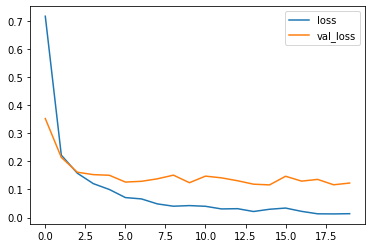

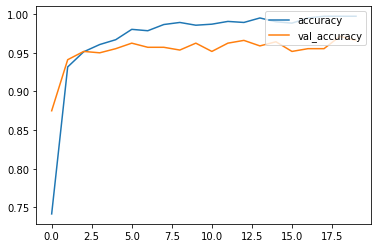

In [21]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

### Model Evaluasi
Setelah dilakukan proses training kemudian diketahui akurasi pada model adalah 0,9696 atau sebanyak 97%

# 6. Preparing for submission

In [22]:
sub_csv ='../input/4-animal-classification/Sample_submission.csv'
path_test = '../input/4-animal-classification/test/test'

#### digunakan untuk mempersiapkan submission pada kompetisi di kaggle

In [23]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


#### untuk menampilkan data pada csv yang akan digunakan untuk submission pada kompetisi kaggle

In [24]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


#### untuk menentukan size dan type file pada gambar di dataset csv

In [25]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


#### menampilkan label pada dataset

In [26]:
# saving file
df_sub.to_csv('submission_file.csv',index=False)